In [1]:
!pip install pandas matplotlib scikit-learn seaborn

  Using cached pandas-2.3.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/111.1 kB ? eta -:--:--
     ------- -------------------------------- 20.5/111.1 kB ? eta -:--:--
     ------- -------------------------------- 20.5/111.1 kB ? eta -:--:--
     ------- -------------------------------- 20.5/111.1 kB ? eta -:--:--
     ------- -------------------------------- 20.5/111.1 kB ? eta -:--:--



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install psycopg2-binary

  Using cached psycopg2_binary-2.9.10-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached psycopg2_binary-2.9.10-cp311-cp311-win_amd64.whl (1.2 MB)



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt

In [9]:
conn = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    dbname = "Insurance Charges Analysis",
    password = "Dataprofessor"
)

cursor = conn.cursor()
print("Connection Successful!")

Connection Successful!


In [10]:
view_query = """
                SELECT 
                    *
                FROM
                    med_insurance_dataset
            """
df = pd.read_sql(view_query, conn)

C:\Users\Data Professor\AppData\Local\Temp\ipykernel_4716\3207788372.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(view_query, conn)


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1340 non-null   int64  
 1   sex       1340 non-null   object 
 2   bmi       1340 non-null   float64
 3   children  1340 non-null   int64  
 4   smoker    1340 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1340 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.4+ KB


In [13]:
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [14]:
df.duplicated().any()

np.True_

In [15]:
df.drop_duplicates(inplace = True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1339.0,39.231516,14.040733,18.0000,27.00000,39.0000,51.00000,64.00000
bmi,1339.0,30.663865,6.096976,15.9600,26.30250,30.4000,34.68750,53.13000
children,1339.0,1.096341,1.206166,0.0000,0.00000,1.0000,2.00000,5.00000
charges,1339.0,13272.840237,12103.479815,1121.8739,4746.69845,9386.1613,16622.10758,63770.42801


In [18]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 - 1.5 * iqr

In [20]:
df.loc[df['charges'] >= lower_bound, 'charges']
df.loc[df['charges'] <= upper_bound, 'charges']

Series([], Name: charges, dtype: float64)

In [21]:
df.shape

(1339, 7)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("scaler", OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = -1))
])

print(num_pipe)
print(cat_pipe)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])


In [30]:
x = df.drop('charges', axis = 1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [27]:
y.shape

(1339,)

In [28]:
x.shape

(1339, 6)

In [33]:
x_train.shape, y_train.shape

((1071, 6), (1071,))

In [42]:
processor = ColumnTransformer(
    transformers=[
        ("cat_pipe", cat_pipe, x.select_dtypes(include=['object', 'category']).columns),
        ("num_pipe", num_pipe, x.select_dtypes(include=['number']).columns)
    ],
    remainder = 'passthrough'
)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [46]:
Models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "Support Vector" : SVR(),
    "K Neighbors" : KNeighborsRegressor()
}

result = {}

In [49]:
for name, model in Models.items():
    model_pipeline = Pipeline([
        ("processor", processor),
        ("model_name", model)
    ])
    model_pipeline.fit(x_train, y_train)

    prediction = model_pipeline.predict(x_test)

    evaluations = {
        'mse': mean_squared_error(y_test, prediction),
        'mae': mean_absolute_error(y_test, prediction),
        'mape': mean_absolute_percentage_error(y_test, prediction),
        "r2" : r2_score(y_test, prediction)
    }

    result[name] = evaluations
    print(f"{name} Result: {evaluations}\n")
    print("-"*60)

Linear Regression Result: {'mse': 37651654.050842494, 'mae': 4085.7419357063577, 'mape': 0.4188186739273198, 'r2': 0.730448296070052}

------------------------------------------------------------
Decision Tree Result: {'mse': 46762015.90820018, 'mae': 3255.8485442110427, 'mape': 0.42953209208455273, 'r2': 0.6652263656137398}

------------------------------------------------------------
Random Forest Result: {'mse': 26318363.582216676, 'mae': 2698.2068531566165, 'mape': 0.33378661911166957, 'r2': 0.8115843798348175}

------------------------------------------------------------
Support Vector Result: {'mse': 151152798.7959962, 'mae': 7953.161757638501, 'mape': 1.0589421132556822, 'r2': -0.08211698785460664}

------------------------------------------------------------
K Neighbors Result: {'mse': 42853789.500479735, 'mae': 3839.8697337046287, 'mape': 0.3715498654536683, 'r2': 0.6932057230709853}

------------------------------------------------------------


In [50]:
rf = RandomForestRegressor()

In [51]:
rf_model = Pipeline([
    ("processor", processor),
    ("rf_model", rf)
]).fit(x_train, y_train)

In [52]:
rf_predict = rf_model.predict(x_train)

In [53]:
importance = rf_model.named_steps["rf_model"].feature_importances_

In [68]:
importance_df = pd.DataFrame(
    {
        "Features" : x.columns.str.title(),
        "Importance": importance
    }
)

importance_df.sort_values(by="Importance", ascending = False)

,Features,Importance
1,Sex,0.626082
4,Smoker,0.206388
3,Children,0.127966
5,Region,0.019365
2,Bmi,0.014036
0,Age,0.006164


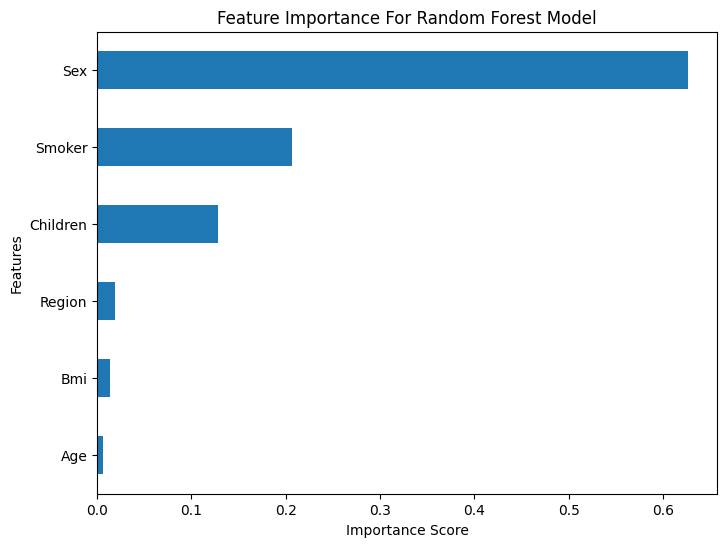

In [63]:
importance_df.sort_values(by="Importance", ascending=True).plot(
    kind="barh",
    x="Features",
    y="Importance",
    legend=False,
    figsize=(8,6),
    title="Feature Importance For Random Forest Model"
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [69]:
import joblib

In [70]:
joblib.dump(rf_model, "Medical Insurance RF Model.joblib")

['Medical Insurance RF Model.joblib']

In [71]:
!pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Data Professor\Desktop\Medical Insurance Project\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Data Professor\Desktop\Medical Insurance Project\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Data Professor\Desktop\Medical Insurance Project\venv\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Data Professor\Desktop\Medical Insurance Project\venv\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Data Professor\AppData\Local\Programs\Python\Python311\Lib\http\client.py

   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ----------- ---------------------------- 2.9/9.9 MB 6.4 kB/s eta 0:18:16
   ---------